||||||||||||||||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
||||||<h1>Greek and Trojan Objects with Python</h1>||||<img src="https://articolidiastronomia.com/wp-content/uploads/2020/08/cropped-orologio-solare.jpg" alt="articolidiastronomia logo" style="height:50px; width:50px;"/>|| [articolidiastronomia.com](attachment:./articolidiastronomia.com) </br> Alessandro Fumagalli|||<img src="https://articolidiastronomia.com/wp-content/uploads/2021/01/licenza.png" alt="licenza" style="height:25px; width:120px;"/>||

### Import the modules needed for processing

In [1]:
import pandas as pd
import seaborn as sns

### Read MPC file with orbital data
- Data downloaded from https://cgi.minorplanetcenter.net/data

In [2]:
df = pd.read_csv("data/mpcorb_extended.csv", low_memory=False)
pd.set_option("display.max_columns", None)
df.head()

,H,G,Num_obs,rms,U,Arc_years,Perturbers,Perturbers_2,Number,Name,Principal_desig,Other_desigs,Epoch,M,Peri,Node,i,e,n,a,Ref,Num_opps,Computer,Hex_flags,Last_obs,Tp,Orbital_period,Perihelion_dist,Aphelion_dist,Semilatus_rectum,Synodic_period,Orbit_type,NEO_flag,One_km_NEO_flag,PHA_flag,Critical_list_numbered_object_flag,One_opposition_object_flag,Arc_length
0,3.32,0.15,7259.0,0.65,0,1801-2022,M-v,30l,(1),Ceres,A801 AA,"['A899 OF', '1943 XB']",2459800.5,334.32723,73.53158,80.26642,10.58680,0.078636,0.214181,2.766619,E2022-SB7,123,MPCLINUX,0000,2022-09-16,2.459920e+06,4.601761,2.549064,2.984174,1.374756,1.277642,MBA,NaN,NaN,NaN,NaN,NaN,NaN
1,4.12,0.15,8871.0,0.59,0,1804-2022,M-c,28k,(2),Pallas,A802 FA,NaN,2459800.5,315.09111,310.84262,172.91791,34.92715,0.229986,0.213851,2.769463,MPO710565,120,MPCLINUX,0000,2022-08-04,2.460011e+06,4.608859,2.132524,3.406402,1.311488,1.277096,MBA,NaN,NaN,NaN,NaN,NaN,NaN
2,5.14,0.15,7411.0,0.63,0,1804-2022,M-v,3El,(3),Juno,A804 RA,NaN,2459800.5,306.62242,247.80396,169.84591,12.99223,0.256775,0.225857,2.670422,E2022-U28,113,MPCLINUX,0000,2022-10-16,2.460037e+06,4.363851,1.984725,3.356120,1.247176,1.297278,MBA,NaN,NaN,NaN,NaN,NaN,NaN
3,3.20,0.15,7508.0,0.63,0,1821-2022,M-p,18l,(4),Vesta,A807 FA,NaN,2459800.5,61.19232,151.25772,103.80084,7.14078,0.088402,0.271511,2.361987,E2022-T39,108,MPCLINUX,0000,2022-09-23,2.459575e+06,3.630081,2.153183,2.570791,1.171764,1.380216,MBA,NaN,NaN,NaN,NaN,NaN,NaN
4,7.02,0.15,3099.0,0.72,0,1845-2022,M-v,3El,(5),Astraea,A845 XA,['1969 SE'],2459800.5,208.56769,358.79230,141.56759,5.36542,0.188985,0.238175,2.577540,E2022-U63,85,MPCLINUX,0000,2022-10-13,2.460436e+06,4.138168,2.090423,3.064657,1.242741,1.318657,MBA,NaN,NaN,NaN,NaN,NaN,NaN


### Show the size of dataframe in terms of numbers of records found

In [3]:
df.dropna()
df.shape

(1243630, 38)

### Pre processing
- Removed useless columns 
- Renamed orbit type
- List all different orbit types

In [4]:
#removed useless fields and rename others
df.drop(['NEO_flag','Critical_list_numbered_object_flag','One_opposition_object_flag'], axis=1, inplace=True)
df.drop(['One_km_NEO_flag','Computer','Number','U','PHA_flag', 'Hex_flags'], axis=1, inplace=True)
df.drop(['Ref','Arc_length','Tp','Num_opps','Perturbers_2','Perturbers','n'], axis=1, inplace=True)
df.drop(['Semilatus_rectum','Synodic_period','Peri','Node'], axis=1, inplace=True)
df.drop(['Last_obs','Epoch'], axis=1, inplace=True)
df.drop(['Num_obs','rms'], axis=1, inplace=True)

df.rename(columns={"Perihelion_dist": "q", "Aphelion_dist": "Q"}, inplace=True)
df["Orbit_type"].replace({"Object with perihelion distance < 1.665 AU": "q < 1.665 AU"}, inplace=True)
df["Orbit_type"].replace({"Jupiter Trojan": "Trojan"}, inplace=True)
df.Orbit_type.unique()

array(['MBA', 'Phocaea', 'q < 1.665 AU', 'Hilda', 'Amor', 'Hungaria',
       'Trojan', 'Apollo', 'Distant Object', 'Aten', 'Atira'],
      dtype=object)

### Filter on the following object types:

- Object type $\in$ {Hilda, Trojan, Hungaria}
- Object with $\sigma$ < 10

In [5]:
df[['Discover', 'Last_Obs']] = df['Arc_years'].str.split('-', n=1, expand=True)
df.head()

,H,G,Arc_years,Name,Principal_desig,Other_desigs,M,i,e,a,Orbital_period,q,Q,Orbit_type,Discover,Last_Obs
0,3.32,0.15,1801-2022,Ceres,A801 AA,"['A899 OF', '1943 XB']",334.32723,10.58680,0.078636,2.766619,4.601761,2.549064,2.984174,MBA,1801,2022
1,4.12,0.15,1804-2022,Pallas,A802 FA,NaN,315.09111,34.92715,0.229986,2.769463,4.608859,2.132524,3.406402,MBA,1804,2022
2,5.14,0.15,1804-2022,Juno,A804 RA,NaN,306.62242,12.99223,0.256775,2.670422,4.363851,1.984725,3.356120,MBA,1804,2022
3,3.20,0.15,1821-2022,Vesta,A807 FA,NaN,61.19232,7.14078,0.088402,2.361987,3.630081,2.153183,2.570791,MBA,1821,2022
4,7.02,0.15,1845-2022,Astraea,A845 XA,['1969 SE'],208.56769,5.36542,0.188985,2.577540,4.138168,2.090423,3.064657,MBA,1845,2022


In [6]:
MPC_Jupyter_H = df.apply(lambda r: r[df['Orbit_type'].isin(['Hungaria','Hilda','Trojan'])])
MPC_Jupyter_no_outliers = MPC_Jupyter_H[MPC_Jupyter_H['H'] < (10 * MPC_Jupyter_H['H'].std())] 

## Trojan objects

In [7]:
MPC_Jupyter_no_outliers_Trojan = MPC_Jupyter_no_outliers[MPC_Jupyter_no_outliers['Orbit_type'] =='Trojan']
MPC_Jupyter_no_outliers_Trojan.head(5)

,H,G,Arc_years,Name,Principal_desig,Other_desigs,M,i,e,a,Orbital_period,q,Q,Orbit_type,Discover,Last_Obs
587,8.27,0.15,1906-2022,Achilles,A906 DN,NaN,337.91683,10.31992,0.148139,5.209205,11.889323,4.437519,5.980890,Trojan,1906,2022
616,8.18,0.15,1906-2022,Patroclus,A906 UL,"['1941 XC', '1962 NB']",303.03188,22.06206,0.139868,5.210104,11.892403,4.481378,5.938830,Trojan,1906,2022
623,7.45,0.15,1907-2022,Hektor,A907 CF,['1948 VD'],271.39649,18.15500,0.022738,5.268938,12.094409,5.149131,5.388745,Trojan,1907,2022
658,8.72,0.15,1908-2022,Nestor,A908 FE,['A914 WF'],81.65525,4.52244,0.116972,5.167175,11.745724,4.562762,5.771589,Trojan,1908,2022
883,8.70,0.15,1917-2022,Priamus,A917 SU,"['1929 XX', '1938 KE']",30.93289,8.90872,0.125238,5.195633,11.842888,4.544944,5.846321,Trojan,1917,2022


### Filter on top 120 Trojan objects

In [8]:
n_trojan_object = 120
object_list_tot = MPC_Jupyter_no_outliers_Trojan.set_index('Principal_desig').to_dict()['Name']
object_list = {key: value for (key, value) in object_list_tot.items() if not str(value) == 'nan'}
object_list = {A:N for (A,N) in [x for x in object_list.items()][:n_trojan_object]}
main_body = {"Sun" : 'Sun', "Jupiter" : 'Jupiter'}
object_list = {**main_body, **object_list}

In [9]:
list(object_list.items())[:120]

[('Sun', 'Sun'),
 ('Jupiter', 'Jupiter'),
 ('A906 DN', 'Achilles'),
 ('A906 UL', 'Patroclus'),
 ('A907 CF', 'Hektor'),
 ('A908 FE', 'Nestor'),
 ('A917 SU', 'Priamus'),
 ('A919 FB', 'Agamemnon'),
 ('1930 BH', 'Odysseus'),
 ('1930 UA', 'Aneas'),
 ('1930 UB', 'Anchises'),
 ('1931 YA', 'Troilus'),
 ('1936 QW', 'Ajax'),
 ('1937 PB', 'Diomedes'),
 ('1950 SA', 'Antilochus'),
 ('1957 MK', 'Menelaus'),
 ('1949 SB', 'Telamon'),
 ('1971 EA', 'Deiphobus'),
 ('2008 P-L', 'Thersites'),
 ('4596 P-L', 'Philoctetes'),
 ('1971 FE', 'Glaukos'),
 ('1971 FF', 'Astyanax'),
 ('1971 FG', 'Helenos'),
 ('1971 FH', 'Agenor'),
 ('1976 UQ', 'Stentor'),
 ('1976 UW', 'Epeios'),
 ('1977 QH1', 'Antenor'),
 ('1977 TL3', 'Sarpedon'),
 ('1979 WM', 'Alcathous'),
 ('1975 WM1', 'Neoptolemus'),
 ('1981 AC', 'Phereclos'),
 ('1977 TJ3', 'Cebriones'),
 ('1966 BA1', 'Palamedes'),
 ('1978 TB', 'Acamas'),
 ('1982 BC3', 'Pandarus'),
 ('1980 GC', 'Idomeneus'),
 ('1981 LK', 'Teucer'),
 ('1975 QD', 'Peiroos'),
 ('1981 AE1', 'Memnon'),

### Plot current orbit snapshot

In [10]:
import numpy as np
import rebound
import datetime

sim = rebound.Simulation()
sim.units = ['mearth','day','AU']

print(f"*** G: {sim.G}") 

index_obj = 0
missing_mass = []
for jupiter_object, jupiter_name in object_list.items():
    sim.add(jupiter_object)
    print(f"*** Mass of object: {jupiter_name} {sim.particles[index_obj].m} Radius: {sim.particles[index_obj].r}")
    index_obj = index_obj + 1

current_time = datetime.datetime.now()
print("*** Current timestamp is:", current_time)

for i in missing_mass:
    object_list.pop(i)

sim.move_to_com()
#sim.integrator = "ias15"

Jupiter_period = 4330 # Jupiter period
N_output = 433 # number of sample 

# each point is 10 Earth days

x_pos = np.zeros((len(object_list), N_output)) 
y_pos = np.zeros((len(object_list), N_output))
z_pos = np.zeros((len(object_list), N_output))

print(f"*** step: {sim.dt}") 

times = np.linspace(0, Jupiter_period, num = N_output) 

object_index = 0
for jupiter_object, jupiter_name in object_list.items():
    print (f"Integration for object number: {object_index} name: {jupiter_name}")
    for position, t in enumerate (times):
        sim.integrate(t)
        x_pos[object_index, position] = sim.particles[object_index].x
        y_pos[object_index, position] = sim.particles[object_index].y
        z_pos[object_index, position] = sim.particles[object_index].z
    object_index = object_index + 1

*** G: 8.887692445125634e-10
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
*** Mass of object: Sun 332946.0488322924 Radius: 0.0
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
*** Mass of object: Jupiter 317.8941938720353 Radius: 0.0
Searching NASA Horizons for 'A906 DN'... 
Found: 588 Achilles (A906 DN) 
*** Mass of object: Achilles 0.0 Radius: 0.0
Searching NASA Horizons for 'A906 UL'... 


/home/alfumaga2001/.local/lib/python3.8/site-packages/rebound/horizons.py:168: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: 617 Patroclus (A906 UL) 
*** Mass of object: Patroclus 0.0 Radius: 0.0
Searching NASA Horizons for 'A907 CF'... 
Found: 624 Hektor (A907 CF) 
*** Mass of object: Hektor 0.0 Radius: 0.0
Searching NASA Horizons for 'A908 FE'... 
Found: 659 Nestor (A908 FE) 
*** Mass of object: Nestor 0.0 Radius: 0.0
Searching NASA Horizons for 'A917 SU'... 
Found: 884 Priamus (A917 SU) 
*** Mass of object: Priamus 0.0 Radius: 0.0
Searching NASA Horizons for 'A919 FB'... 
Found: 911 Agamemnon (A919 FB) 
*** Mass of object: Agamemnon 0.0 Radius: 0.0
Searching NASA Horizons for '1930 BH'... 
Found: 1143 Odysseus (1930 BH) 
*** Mass of object: Odysseus 0.0 Radius: 0.0
Searching NASA Horizons for '1930 UA'... 
Found: 1172 Aneas (1930 UA) 
*** Mass of object: Aneas 0.0 Radius: 0.0
Searching NASA Horizons for '1930 UB'... 
Found: 1173 Anchises (1930 UB) 
*** Mass of object: Anchises 0.0 Radius: 0.0
Searching NASA Horizons for '1931 YA'... 
Found: 1208 Troilus (1931 YA) 
*** Mass of object: Troilus 0.0 Ra

Found: 4791 Iphidamas (1988 PB1) 
*** Mass of object: Iphidamas 0.0 Radius: 0.0
Searching NASA Horizons for '1988 RK1'... 
Found: 4792 Lykaon (1988 RK1) 
*** Mass of object: Lykaon 0.0 Radius: 0.0
Searching NASA Horizons for '1990 VH7'... 
Found: 4805 Asteropaios (1990 VH7) 
*** Mass of object: Asteropaios 0.0 Radius: 0.0
Searching NASA Horizons for '1988 QE'... 
Found: 4827 Dares (1988 QE) 
*** Mass of object: Dares 0.0 Radius: 0.0
Searching NASA Horizons for '1988 RV'... 
Found: 4828 Misenus (1988 RV) 
*** Mass of object: Misenus 0.0 Radius: 0.0
Searching NASA Horizons for '1988 RM1'... 
Found: 4829 Sergestus (1988 RM1) 
*** Mass of object: Sergestus 0.0 Radius: 0.0
Searching NASA Horizons for '1988 TU1'... 
Found: 4832 Palinurus (1988 TU1) 
*** Mass of object: Palinurus 0.0 Radius: 0.0
Searching NASA Horizons for '1989 AL2'... 
Found: 4833 Meges (1989 AL2) 
*** Mass of object: Meges 0.0 Radius: 0.0
Searching NASA Horizons for '1989 AM2'... 
Found: 4834 Thoas (1989 AM2) 
*** Mass of 

/home/alfumaga2001/.local/lib/python3.8/site-packages/rebound/horizons.py:165: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: 5209 Oloosson (1989 CW1) 
*** Mass of object: Oloosson 0.0 Radius: 0.0
Searching NASA Horizons for '1988 RL10'... 
Found: 5233 Nastes (1988 RL10) 
*** Mass of object: Nastes 0.0 Radius: 0.0
Searching NASA Horizons for '1973 SQ1'... 
Found: 5244 Amphilochos (1973 SQ1) 
*** Mass of object: Amphilochos 0.0 Radius: 0.0
Searching NASA Horizons for '1986 VG1'... 
Found: 5254 Ulysses (1986 VG1) 
*** Mass of object: Ulysses 0.0 Radius: 0.0
Searching NASA Horizons for '1988 RS10'... 
Found: 5257 Laogonus (1988 RS10) 
*** Mass of object: Laogonus 0.0 Radius: 0.0
Searching NASA Horizons for '1989 AU1'... 
Found: 5258 Rhoeo (1989 AU1) 
*** Mass of object: Rhoeo 0.0 Radius: 0.0
Searching NASA Horizons for '1989 BB1'... 
Found: 5259 Epeigeus (1989 BB1) 
*** Mass of object: Epeigeus 0.0 Radius: 0.0
Searching NASA Horizons for '1991 KC'... 
Found: 5264 Telephus (1991 KC) 
*** Mass of object: Telephus 0.0 Radius: 0.0
Searching NASA Horizons for '1989 BW'... 
Found: 5283 Pyrrhus (1989 BW) 
*** Ma

Integration for object number: 109 name: Eumelos
Integration for object number: 110 name: Mulius
Integration for object number: 111 name: Cloanthus
Integration for object number: 112 name: Gyas
Integration for object number: 113 name: Deikoon
Integration for object number: 114 name: Axius
Integration for object number: 115 name: Amphimachus
Integration for object number: 116 name: Rhigmus
Integration for object number: 117 name: Eetion
Integration for object number: 118 name: Aulis
Integration for object number: 119 name: Harpalion
Integration for object number: 120 name: Leitus
Integration for object number: 121 name: Laomedon


### Save status

In [11]:
sim.simulationarchive_snapshot(f"bin/trojan_simulation_{n_trojan_object}.bin", deletefile=True)
#sim = rebound.Simulation(f"/data/workspace_files/bin/trojan_simulation_{n_trojan_object}.bin")

### Plot them !!

Trojan objects at localtime: 2023-08-18 16:48:26.449798


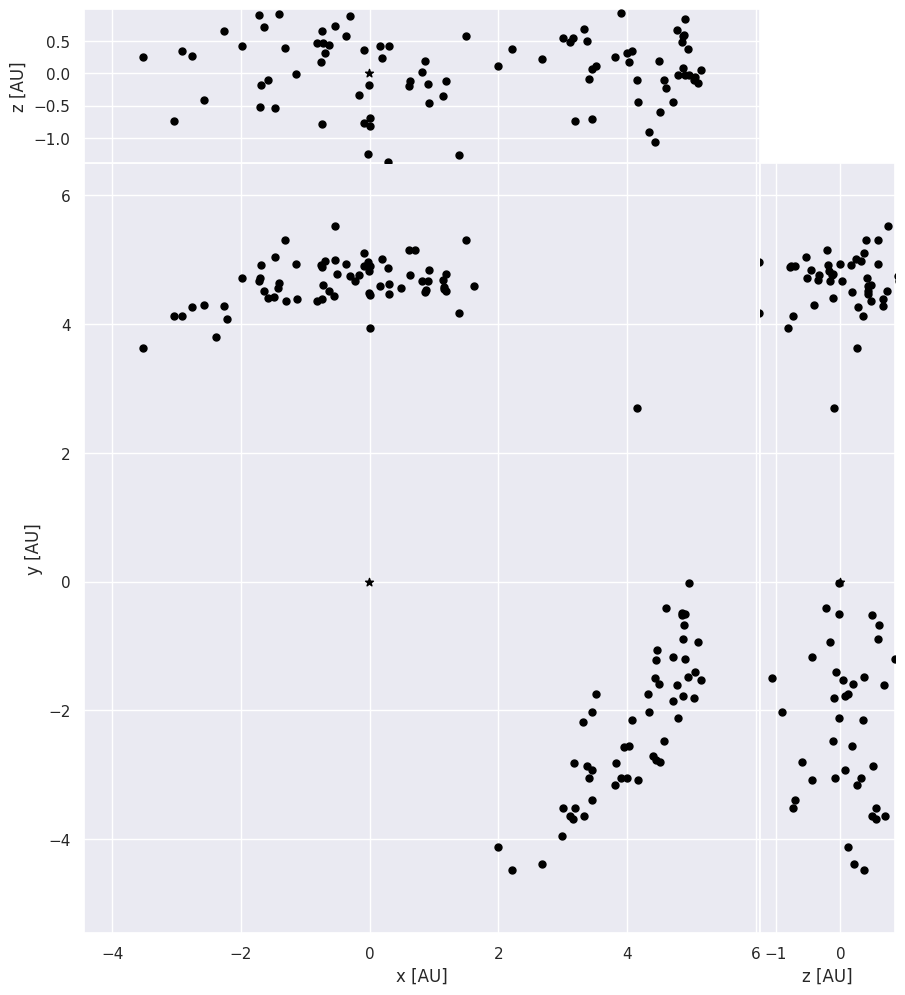

In [12]:
import matplotlib.pyplot as plt
current_time = datetime.datetime.now()
sns.set_theme()
timestamp_str = "Trojan objects at localtime: " + str(current_time)
print (f"{timestamp_str}")
fig = rebound.OrbitPlot(sim, figsize=(12,12), unitlabel="[AU]", color=True, slices=0.2, orbit_type=None, lw=1)
plt.savefig("figure/Trojan_objects_orbit_2d.png", dpi=600)

### Objects Orbit for one Jupiter year

Preparing diagram # [0, 0]
Preparing diagram # [0, 1]
Preparing diagram # [0, 2]
Preparing diagram # [1, 0]
Preparing diagram # [1, 1]
Preparing diagram # [1, 2]
Preparing diagram # [2, 0]
Preparing diagram # [2, 1]
Preparing diagram # [2, 2]
Preparing diagram # [3, 0]
Preparing diagram # [3, 1]


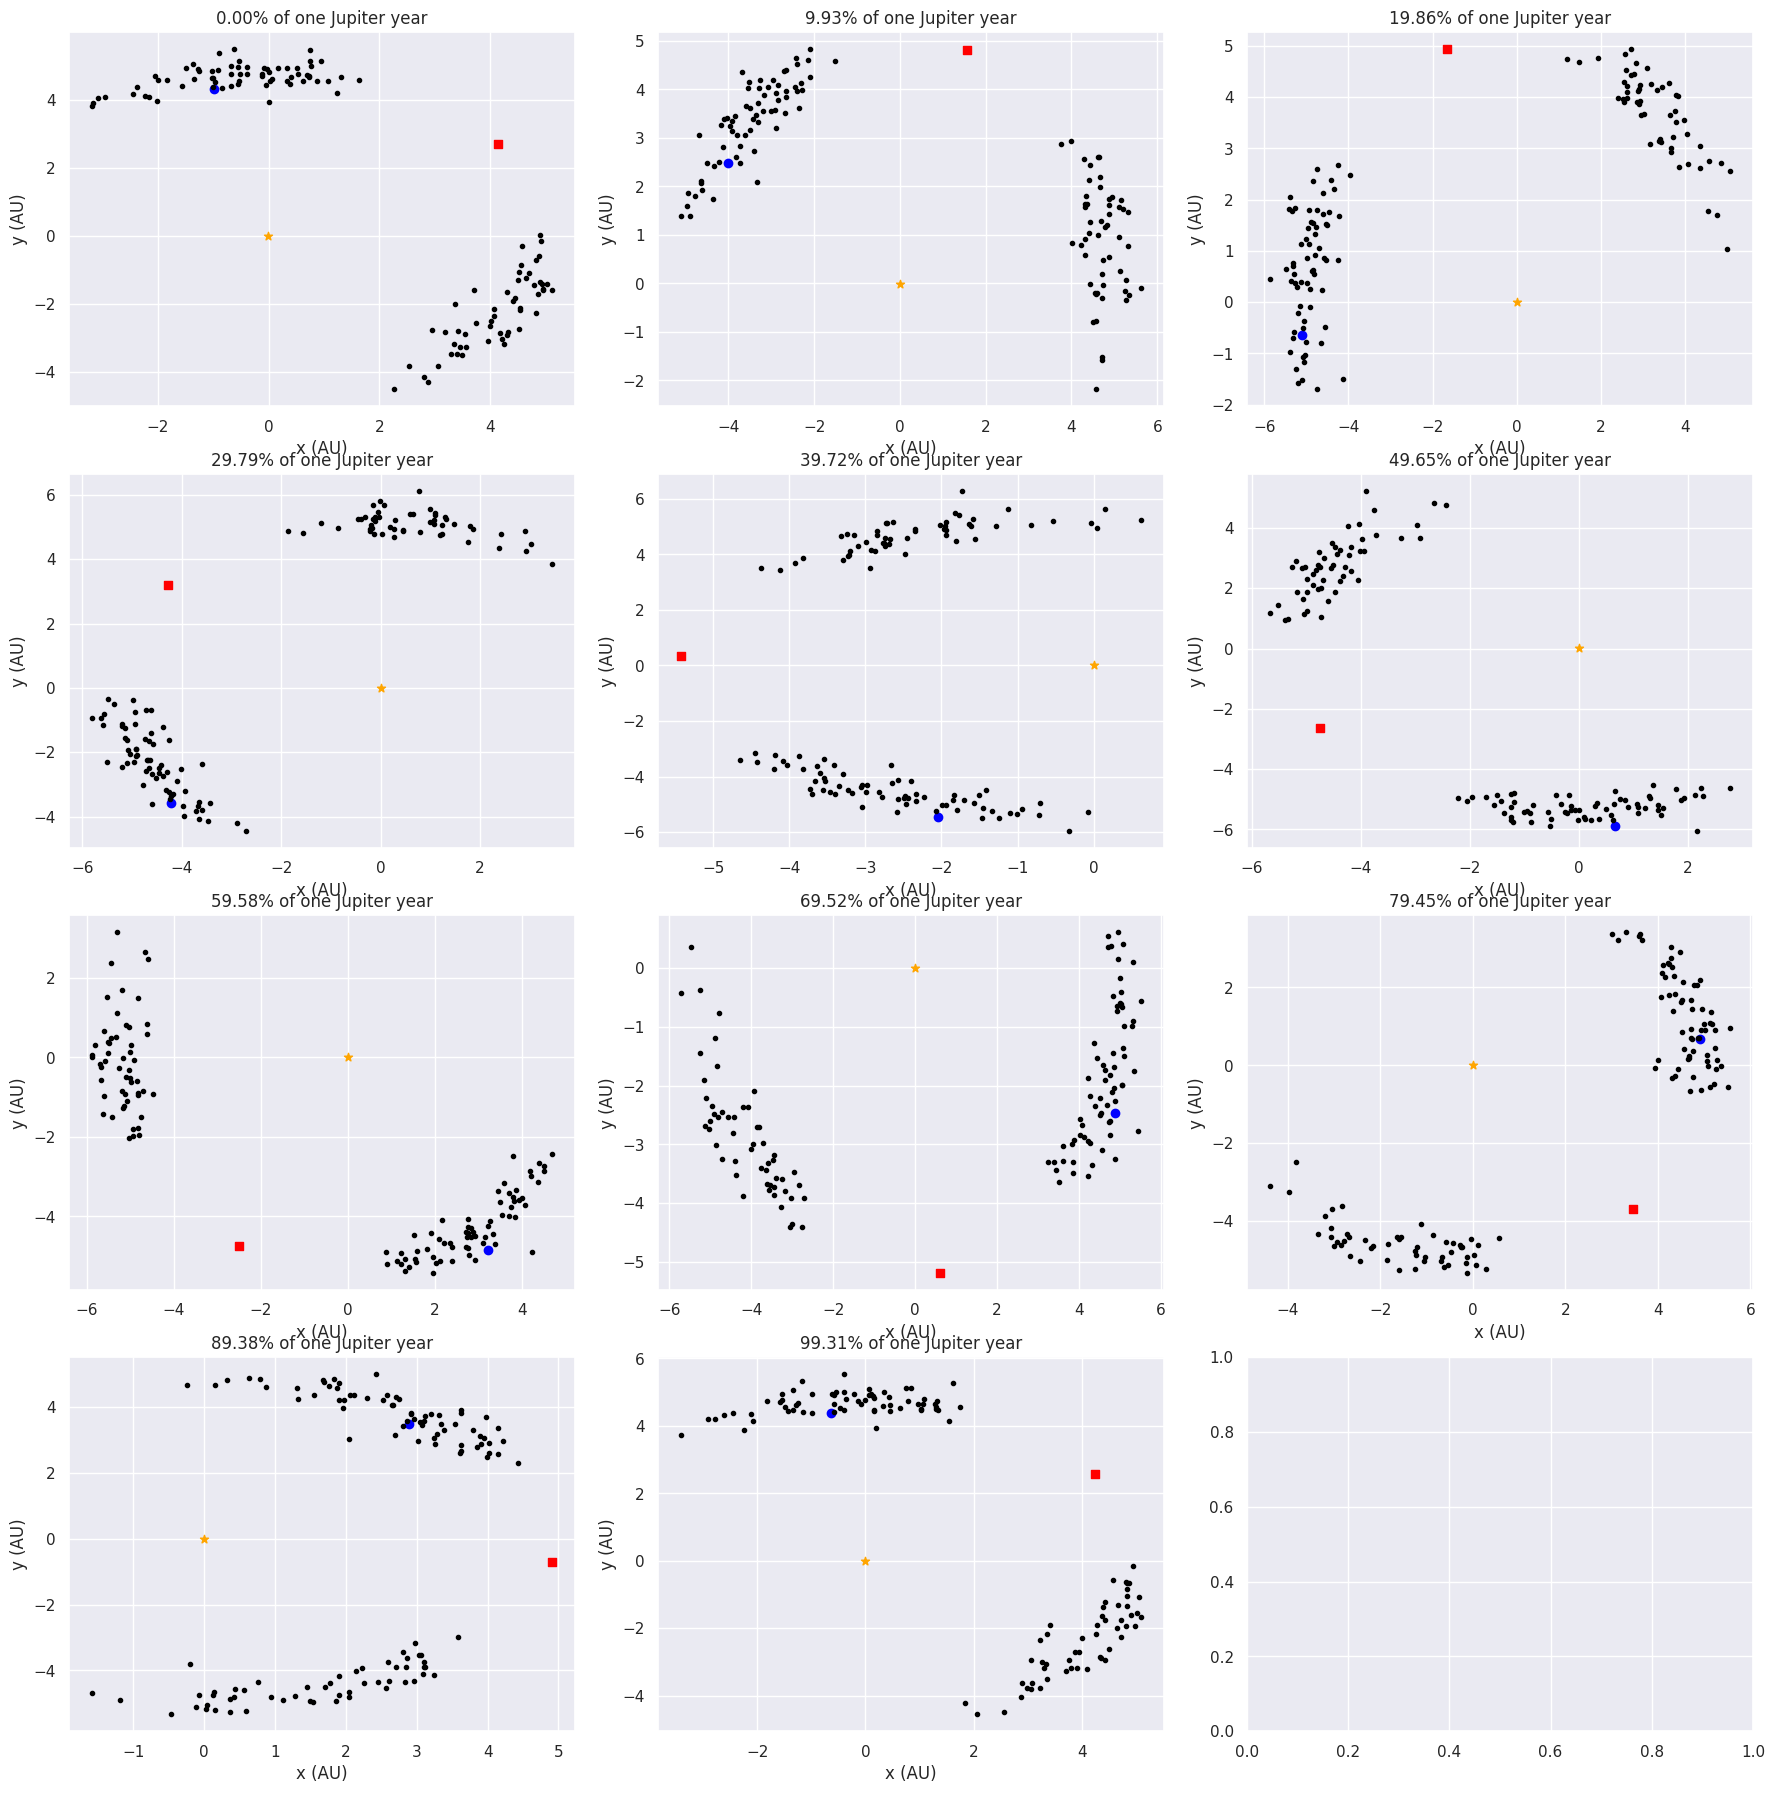

In [13]:
import matplotlib.pyplot as plt

n_row = 4
n_col = 3

fig_hilda, axs = plt.subplots(n_row, n_col, figsize=(18, 18))

row = 0
Jupiter_period = 4330 # Jupiter period
N_output = 433 # number of sample 

fig_hilda.tight_layout(pad = 2.0)

time_tick = 0
for sample in range(0, (n_col * n_row) - 1):
    col = sample % n_col
    print (f"Preparing diagram # [{row}, {col}]")
    for obj in range(0, object_index):
        if obj == 0:
            axs[row, col].scatter(x_pos[obj, time_tick], y_pos[obj, time_tick], c= 'orange', marker="*")
        else:
            if obj == 1:
                axs[row, col].scatter(x_pos[obj, time_tick], y_pos[obj, time_tick], c= 'red', marker="s")
            else:
                if obj == 2:
                    axs[row, col].scatter(x_pos[obj, time_tick], y_pos[obj, time_tick], c= 'blue', marker="o")
                else:
                    axs[row, col].scatter(x_pos[obj, time_tick], y_pos[obj, time_tick], c= 'black', marker=".")
        axs[row, col].grid()
    axs[row, col].set_title(f"{time_tick/N_output * 100:.2f}% of one Jupiter year")
    axs[row, col].set_xlabel("x (AU)")
    axs[row, col].set_ylabel("y (AU)")
    time_tick = time_tick + int(N_output / 10)
    if col == (n_col - 1):
        row = row + 1

plt.savefig("figure/Trojan_objects_orbit_frames.png", dpi=600)

### Plot some of them in 3D

Preparing diagram # [0, 0]
Preparing diagram # [0, 1]
Preparing diagram # [1, 0]
Preparing diagram # [1, 1]


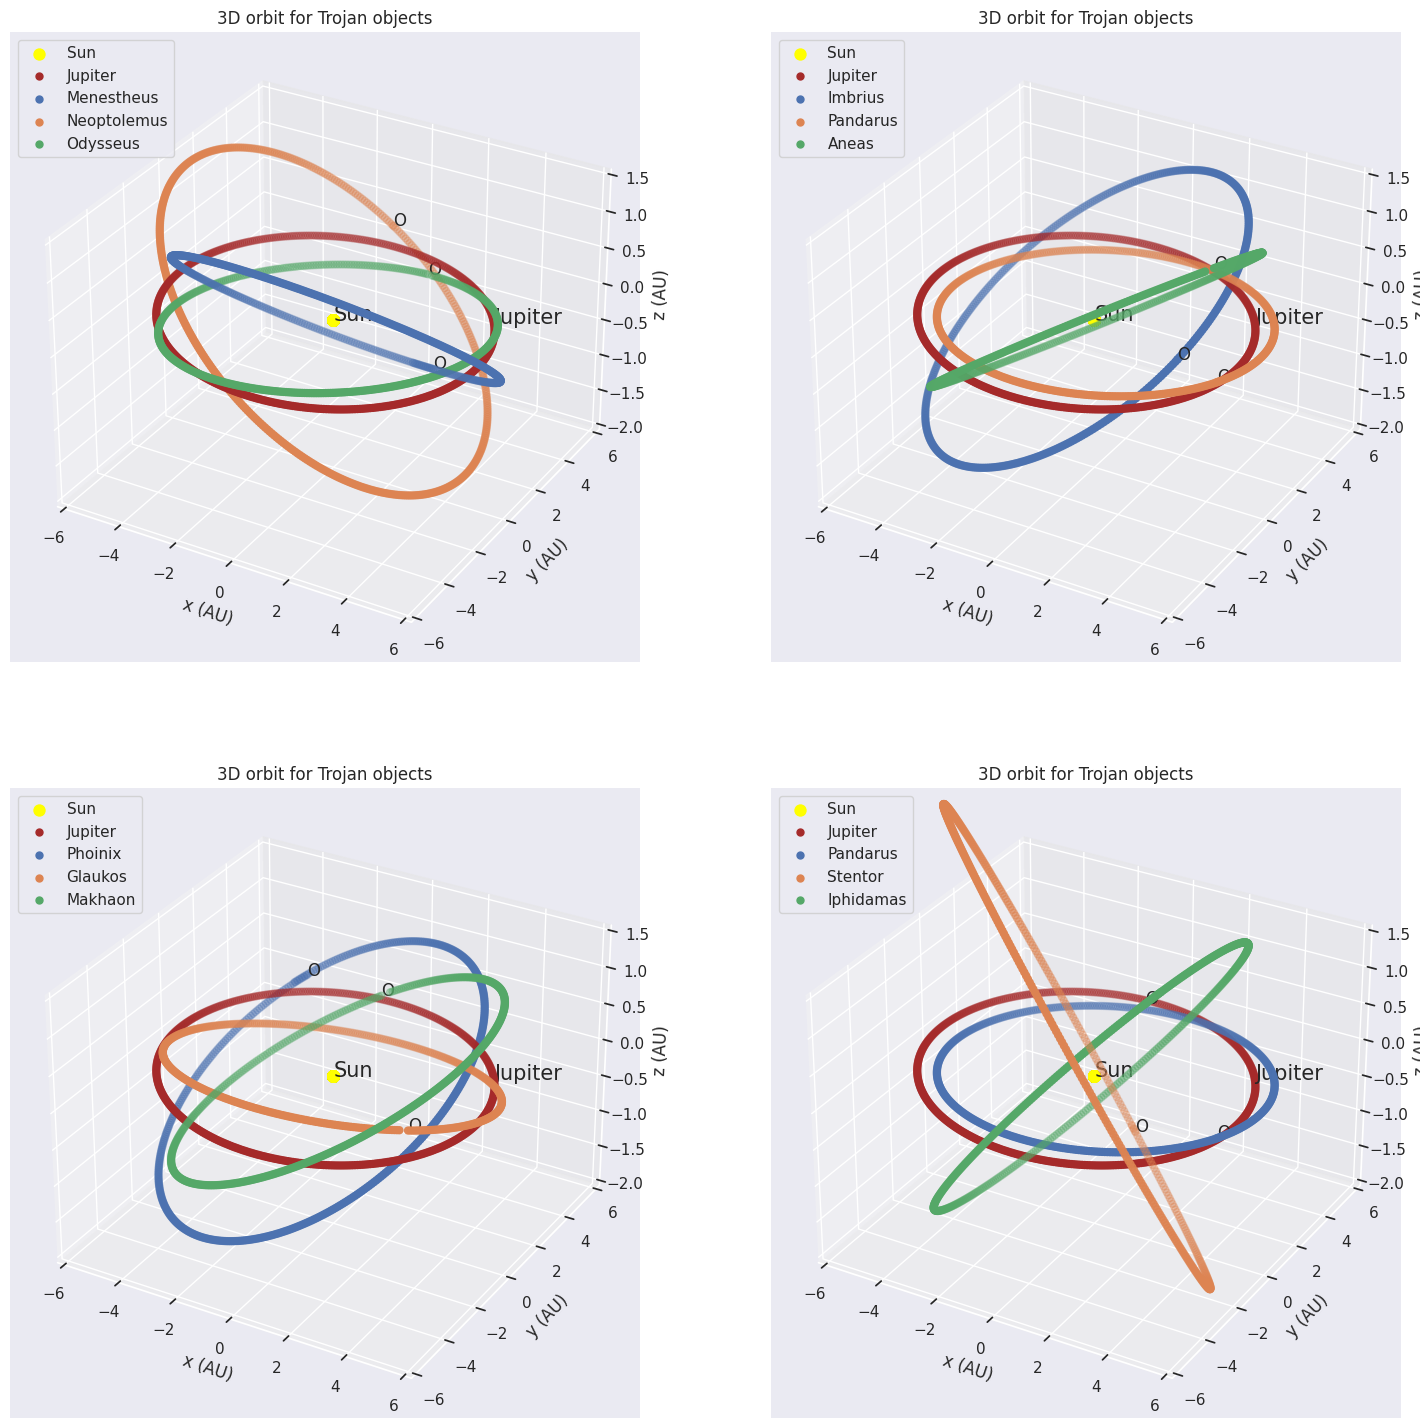

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

n_row = 2
n_col = 2
limit_x = 6

fig_hilda_3d = plt.figure(figsize=(18, 18))
fig_hilda_3d.tight_layout(pad = 2.0)

object_slice_list = list(object_list.values())
row = 0
num_plot = 1

for sample in range(0, (n_col * n_row)):
    col = sample % n_col
    print (f"Preparing diagram # [{row}, {col}]")
    axs = fig_hilda_3d.add_subplot(n_row, n_col, num_plot, projection='3d')
    
    axs.scatter3D(x_pos[0], y_pos[0], z_pos[0], marker='.', color='yellow', s=250)
    axs.text(x_pos[0][0], y_pos[0][0], z_pos[0][0], 'Sun', size=15)
    
    axs.scatter3D(x_pos[1], y_pos[1], z_pos[1], marker='.', color='Brown', s=100)
    axs.text(x_pos[1][0], y_pos[1][0], z_pos[1][0], 'Jupiter', size=15)
    
    leg_list = ['Sun', 'Jupiter']
    random_object_index = np.random.randint(2, object_index, size=3)
    for obj in random_object_index:
        axs.scatter3D(x_pos[obj], y_pos[obj], z_pos[obj], marker='.', s=100)
        axs.text(x_pos[obj][0], y_pos[obj][0], z_pos[obj][0], 'O', size=12)
        leg_list.append(object_slice_list[obj])
    axs.grid()
    axs.set_xlabel('x (AU)')
    axs.set_ylabel('y (AU)')
    axs.set_zlabel('z (AU)')
    axs.set_xlim(-limit_x, limit_x)
    axs.set_ylim(-limit_x, limit_x)
    axs.set_zlim(-2, 1.5)
    axs.legend(leg_list, loc='upper left')

    axs.set_title(f"3D orbit for Trojan objects")
    if col == (n_col - 1):
        row = row + 1
    num_plot = num_plot + 1

plt.savefig("figure/Trojan_objects_orbit_random_3d.png", dpi=600)

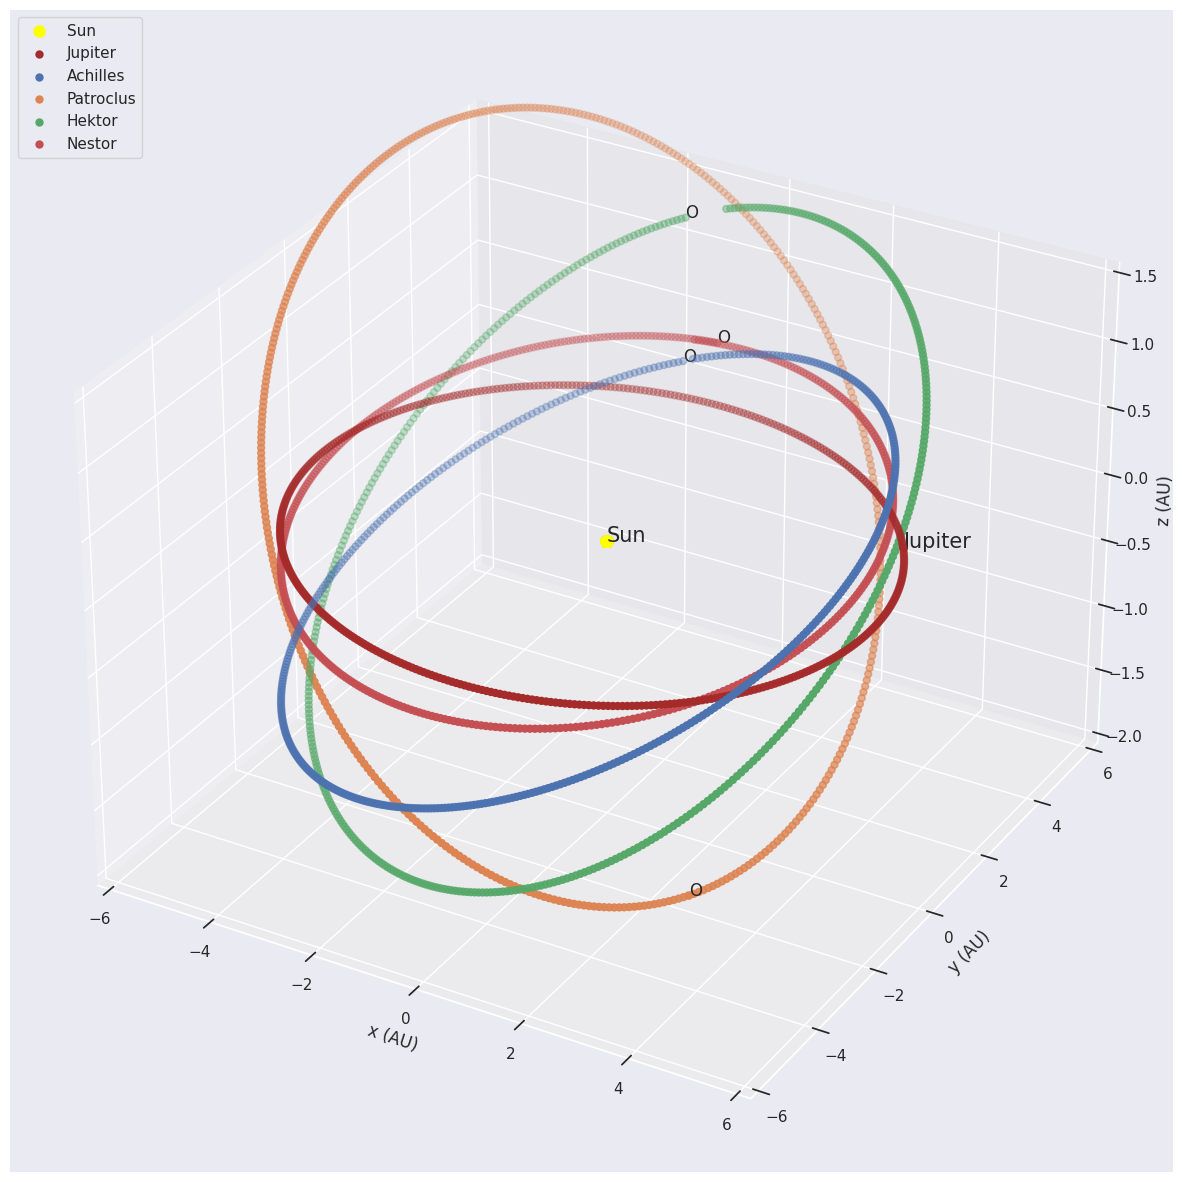

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 35))

ax = plt.axes(projection='3d')

ax.scatter3D(x_pos[0], y_pos[0], z_pos[0], marker='.', color='yellow', s=250)
ax.text(x_pos[0][0], y_pos[0][0], z_pos[0][0], 'Sun', size=15)

ax.scatter3D(x_pos[1], y_pos[1], z_pos[1], marker='.', color='Brown', s=100)
ax.text(x_pos[1][0], y_pos[1][0], z_pos[1][0], 'Jupiter', size=15)

object_index = 0
for jupiter_object, jupiter_name in object_list.items():
    if (object_index == 0) or (object_index == 1):
        object_index = object_index + 1
        continue
    ax.scatter3D(x_pos[object_index], y_pos[object_index], z_pos[object_index], marker='.', s=100)
    ax.text(x_pos[object_index][0], y_pos[object_index][0], z_pos[object_index][0], 'O', size=12)
    if object_index == 5:
        break
    object_index = object_index + 1

ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')
ax.set_zlabel('z (AU)')
limit_x = 6
ax.set_xlim(-limit_x, limit_x); ax.set_ylim(-limit_x, limit_x); ax.set_zlim(-2, 1.5)
ax.legend(object_list.values(), loc='upper left')

plt.savefig("figure/Trojan_objects_orbit_3d.png", dpi=600)

### Resonance between Trojan objects and Jupiter

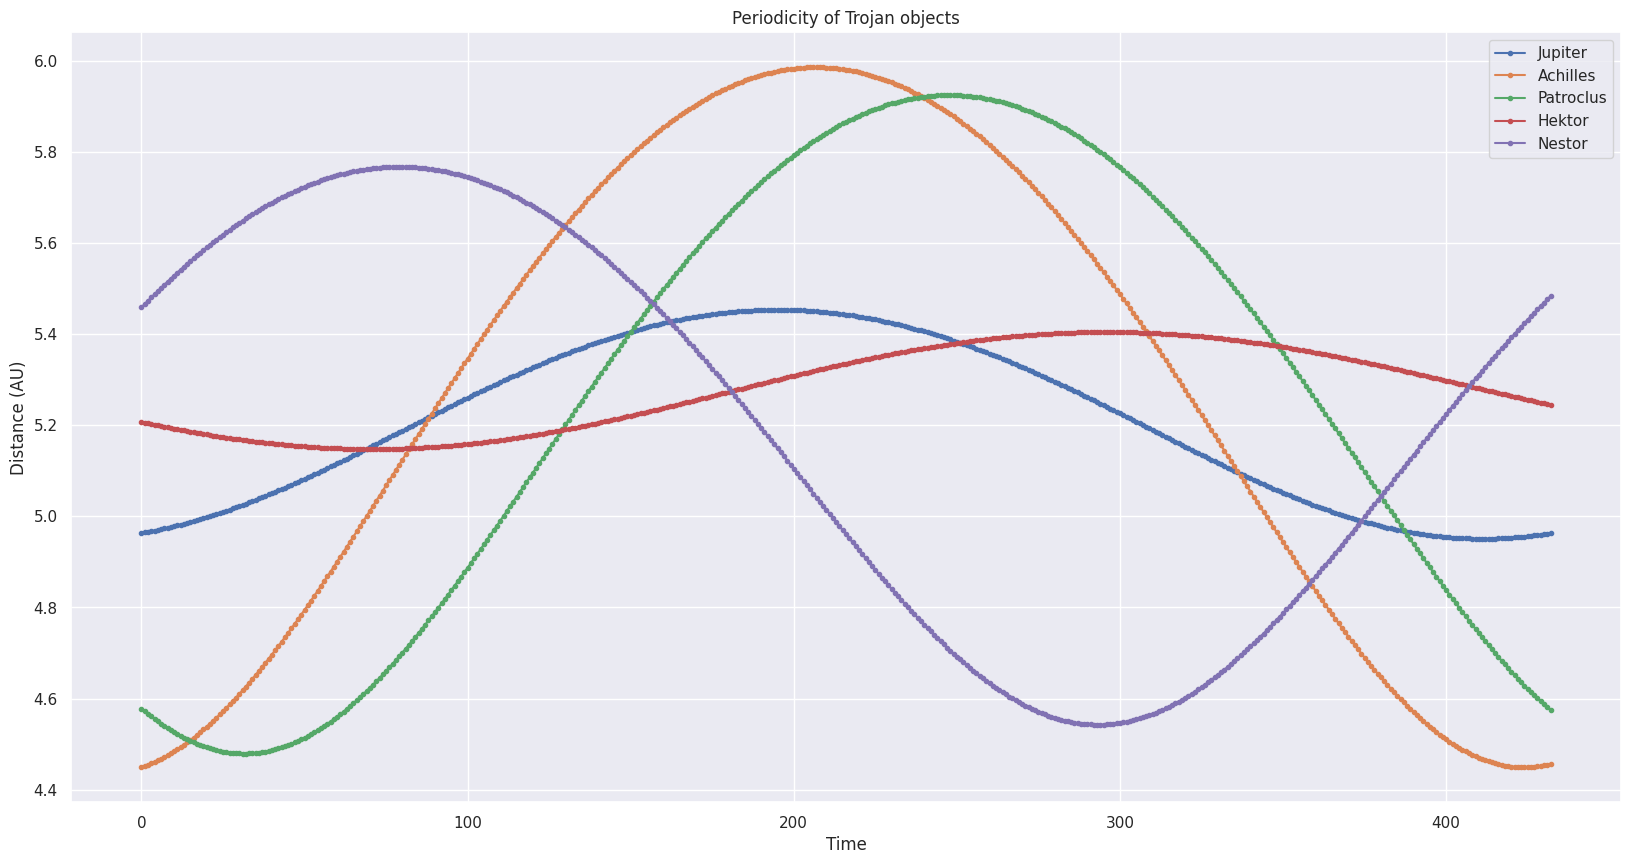

In [16]:
%matplotlib inline

fig = plt.figure(figsize=(20, 10))

object_index = 0
distance = {}
for jupiter_object, jupiter_name in object_list.items():
    if object_index == 0:
        object_index = object_index + 1
        continue
    distance [jupiter_name] = np.zeros((1, N_output)) 
    distance [jupiter_name] = np.sqrt(np.square(x_pos[0]-x_pos[object_index]) + np.square(y_pos[0]-y_pos[object_index]) + np.square(z_pos[0]-z_pos[object_index]))
    object_index = object_index + 1
    plt.plot(distance [jupiter_name], label = jupiter_name, marker=".")
    plt.grid()
    if object_index > 5:
        break

plt.grid()
plt.title ('Periodicity of Trojan objects')
plt.xlabel("Time")
plt.ylabel("Distance (AU)")
plt.legend()

plt.savefig("figure/Trojan_objects_resonance.png", dpi=600)

### Save DF

In [17]:
MPC_Jupyter_no_outliers_Trojan.to_pickle("bin/df_trojan.pkl")

In [18]:
MPC_Jupyter_no_outliers_Trojan = pd.read_pickle("bin/df_trojan.pkl")

### Estimate mass of objects
- (formula) http://www.physics.sfasu.edu/astro/asteroids/sizemagnitude.html
- (table) https://www.minorplanetcenter.net/iau/Sizes.html 
- (formula) https://cneos.jpl.nasa.gov/tools/ast_size_est.html

In [19]:
MPC_Jupyter_no_outliers_Trojan.head(5)

,H,G,Arc_years,Name,Principal_desig,Other_desigs,M,i,e,a,Orbital_period,q,Q,Orbit_type,Discover,Last_Obs
587,8.27,0.15,1906-2022,Achilles,A906 DN,NaN,337.91683,10.31992,0.148139,5.209205,11.889323,4.437519,5.980890,Trojan,1906,2022
616,8.18,0.15,1906-2022,Patroclus,A906 UL,"['1941 XC', '1962 NB']",303.03188,22.06206,0.139868,5.210104,11.892403,4.481378,5.938830,Trojan,1906,2022
623,7.45,0.15,1907-2022,Hektor,A907 CF,['1948 VD'],271.39649,18.15500,0.022738,5.268938,12.094409,5.149131,5.388745,Trojan,1907,2022
658,8.72,0.15,1908-2022,Nestor,A908 FE,['A914 WF'],81.65525,4.52244,0.116972,5.167175,11.745724,4.562762,5.771589,Trojan,1908,2022
883,8.70,0.15,1917-2022,Priamus,A917 SU,"['1929 XX', '1938 KE']",30.93289,8.90872,0.125238,5.195633,11.842888,4.544944,5.846321,Trojan,1917,2022


### Diameter vs albedo data for Trojan objects

- Read data from  https://sbn.psi.edu/pds/resource/neowisediam.html and preprocess them

In [20]:
neo_wise_df = pd.read_csv("data/neowise_trojans.csv")
neo_wise_df.drop(['Slope_param','Mean_JD','N_W1','N_W2','N_W3', 'N_W4','Fit_code','IR_albedo','IR_albedo_err','Beaming_param','Beaming_param_err','Stacked_flag','Reference','Notes'], axis=1, inplace=True)
neo_wise_df['MPC_packed_name'] = neo_wise_df['MPC_packed_name'].str.strip()
neo_wise_df['Prov_design'] = neo_wise_df['Prov_design'].str.strip()
#neo_wise_df = neo_wise_df.apply(lambda r: r[~neo_wise_df['Prov_design'].isin(['-'])])
neo_wise_df.head(10)

,Asteroid_number,Prov_design,MPC_packed_name,Absolute_mag,Diameter,Diameter_err,V_albedo,V_albedo_err
0,588,-,00588,8.47,130.099,0.554,0.043,0.006
1,617,-,00617,8.19,140.362,0.868,0.047,0.003
2,624,-,00624,7.20,147.369,2.325,0.107,0.011
3,659,-,00659,8.99,112.320,1.850,0.035,0.008
4,884,-,00884,8.98,101.093,0.539,0.044,0.002
5,911,-,00911,7.89,131.038,1.195,0.072,0.010
6,1143,-,01143,8.57,114.624,0.592,0.050,0.007
7,1172,-,01172,8.33,118.020,0.806,0.059,0.006
8,1173,-,01173,8.89,99.549,0.846,0.050,0.009
9,1208,-,01208,9.08,100.477,1.097,0.041,0.006


In [21]:
neo_wise_df.describe()

,Asteroid_number,Absolute_mag,Diameter,Diameter_err,V_albedo,V_albedo_err
count,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000
mean,158368.335484,12.257715,20.839765,0.978590,0.074253,0.017230
std,127847.516611,1.136428,16.059590,0.594967,0.025880,0.008994
min,0.000000,7.200000,3.943000,0.100000,0.025000,0.002000
25%,31812.000000,11.600000,12.516000,0.643750,0.056000,0.011000
50%,156265.000000,12.500000,15.553000,0.870500,0.070000,0.015000
75%,264141.750000,13.100000,22.079000,1.177500,0.087000,0.021000
max,514762.000000,15.600000,147.369000,6.824000,0.200000,0.093000


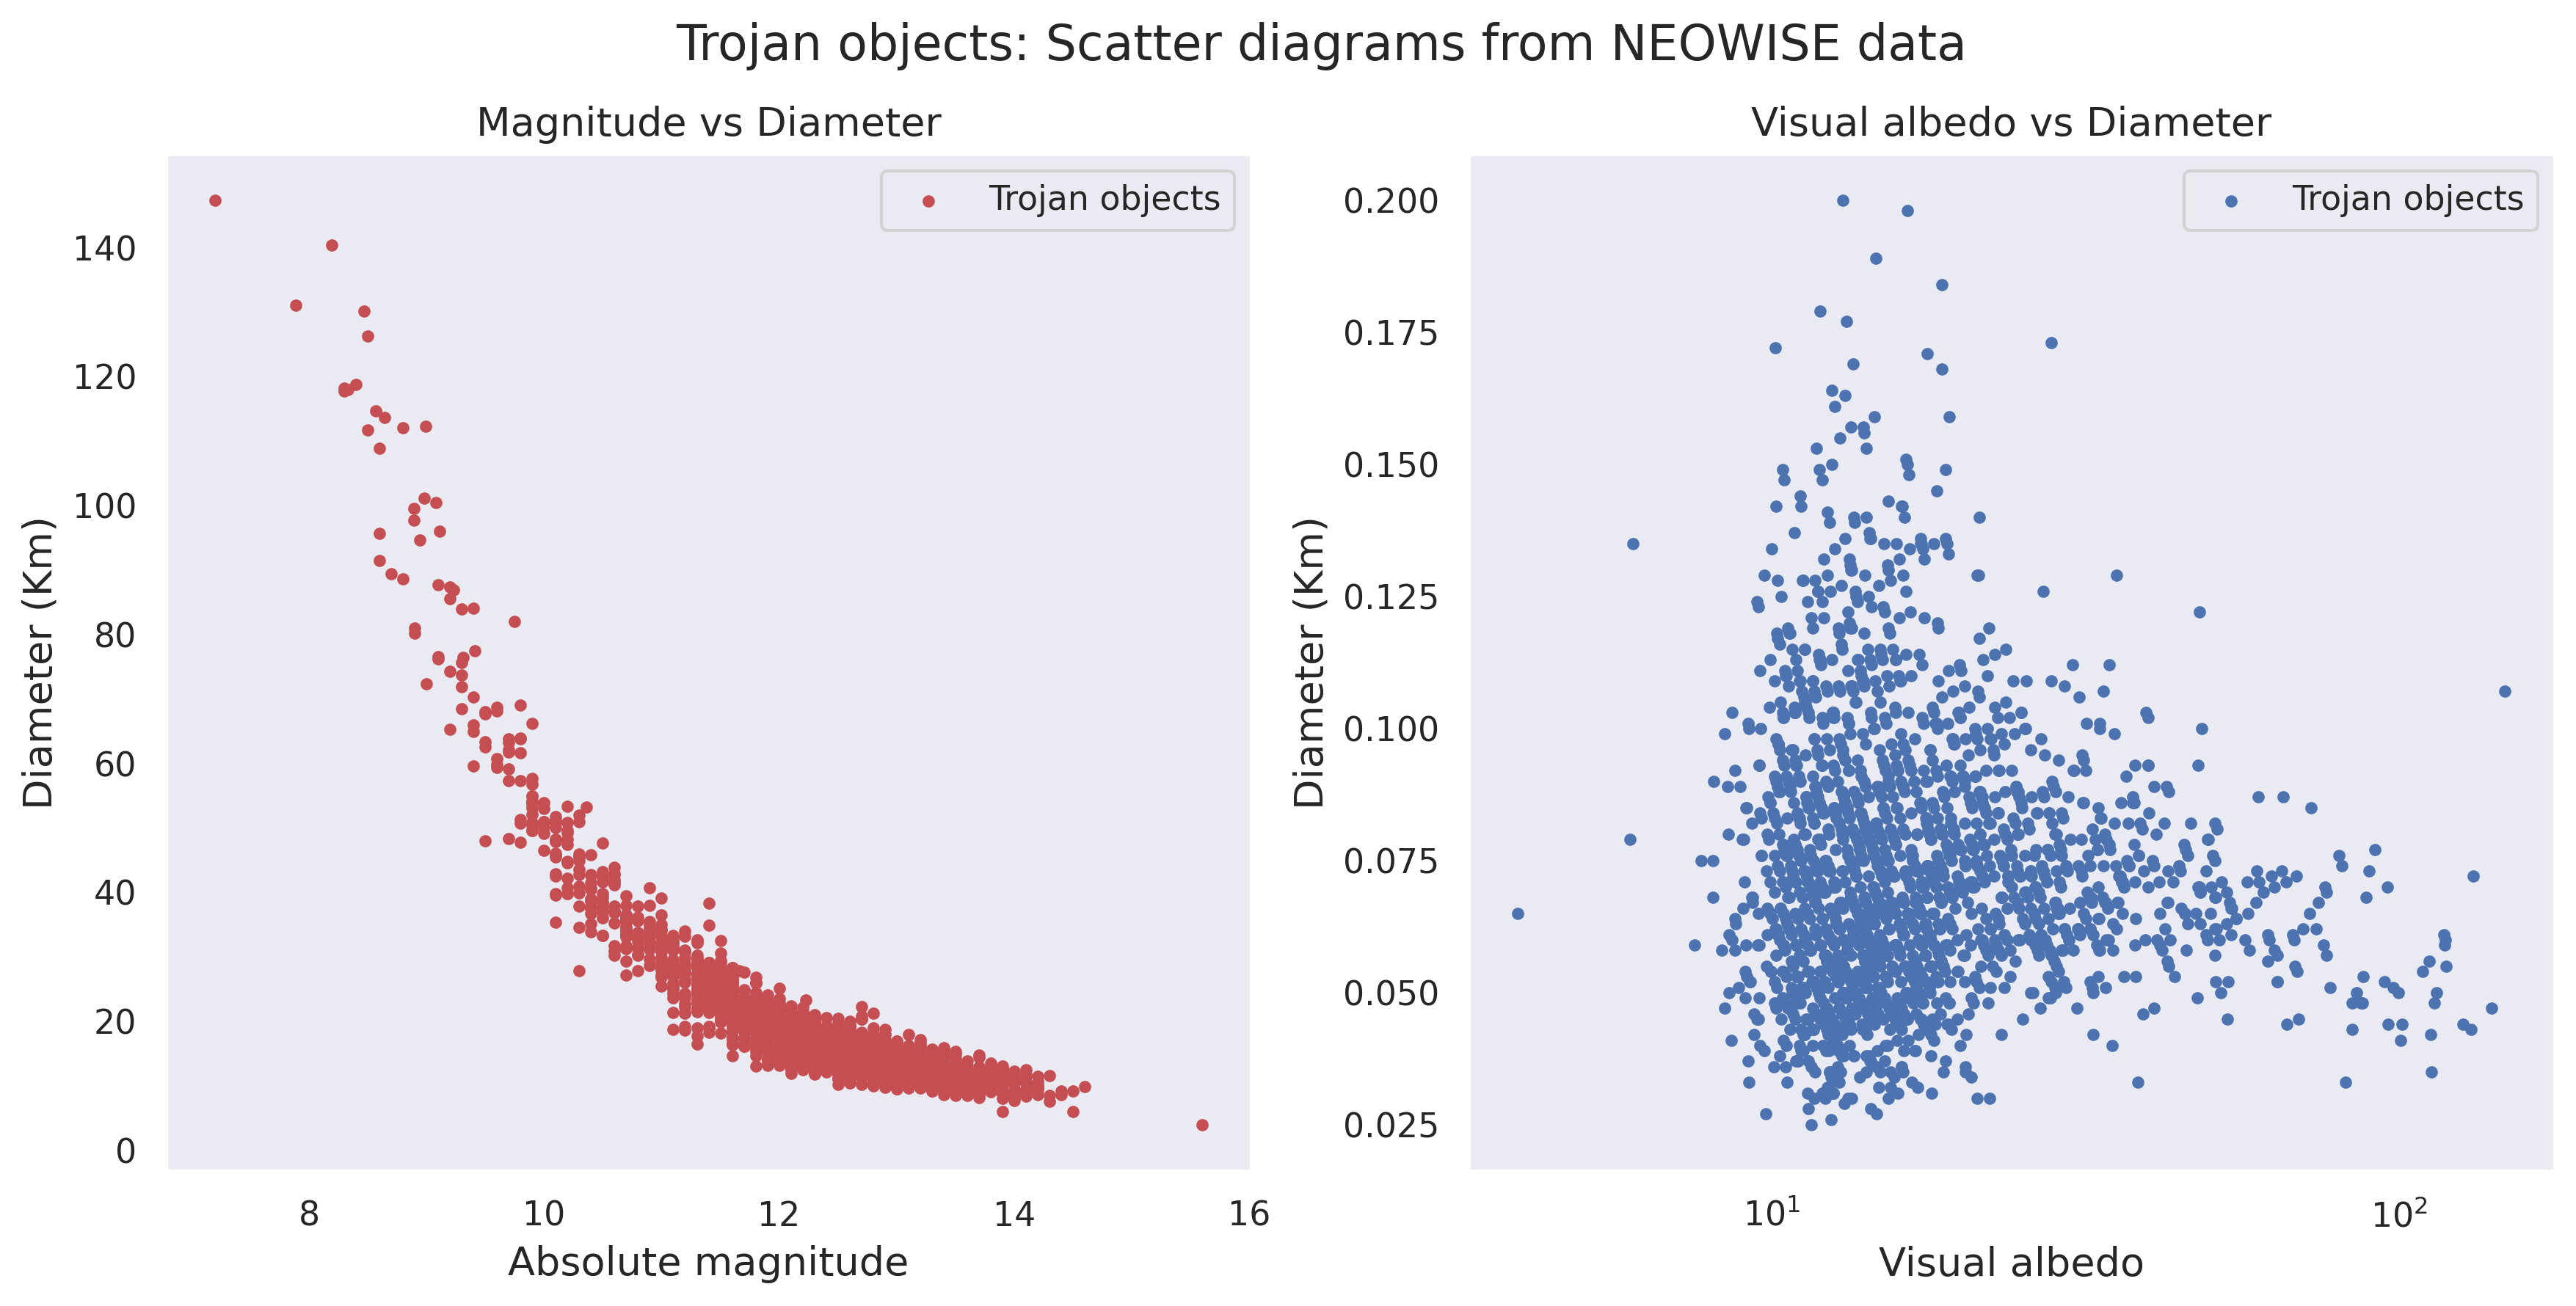

In [22]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

fig.suptitle('Trojan objects: Scatter diagrams from NEOWISE data', fontsize=16)

ax1.set_title('Magnitude vs Diameter', fontsize=13)
x = ax1.scatter(neo_wise_df ['Absolute_mag'], neo_wise_df ['Diameter'], color='r', marker=".", label="Trojan objects")
ax1.set_xlabel("Absolute magnitude", fontsize=13)
ax1.set_ylabel("Diameter (Km)", fontsize=13)
ax1.legend()
ax1.grid()

ax2.set_title('Visual albedo vs Diameter', fontsize=13)
ax2.set_xscale('log')
y = ax2.scatter(neo_wise_df ['Diameter'], neo_wise_df ['V_albedo'], color='b', marker=".", label="Trojan objects")
ax2.grid()
ax2.set_xlabel("Visual albedo", fontsize=13)
ax2.set_ylabel("Diameter (Km)", fontsize=13)
ax2.legend()

fig.savefig('figure/Trojan_objects_magnitude_albedo_diameter.png', dpi=600)

In [25]:
import folium
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Via Bestetti 8, Villasanta')

color = [ "red", "blue", "green", "yellow", "purple", 'black', 'white','orange']

stat = pd.DataFrame({'Stat': neo_wise_df['Diameter'].describe(), 'color': color, 'gav_lat': location.latitude, 'gav_lon': location.longitude})
stat = stat.drop('count')
stat = stat.drop('std')

m = folium.Map(location=(stat['gav_lat'].mean(), stat['gav_lon'].mean()), zoom_start=8, title="Object size", Stamen='Toner')

for lat, lon, diam, color in zip(stat['gav_lat'], 
                                 stat['gav_lon'], 
                                 stat['Stat'], 
                                 stat['color']):
    radius = int(diam * 1000 / 2)    
    label = folium.Popup('Trojan object diameter: ' + str(diam) + " Km", parse_html=True)
    folium.Circle(location = (lat, lon),
                  popup = label,
                  radius = radius,
                  color = color,
                  fill=True,
                  fill_opacity=0.1).add_to(m)

m.save('figure/Trojan_objects_size_on_terrain_folium.html')
m

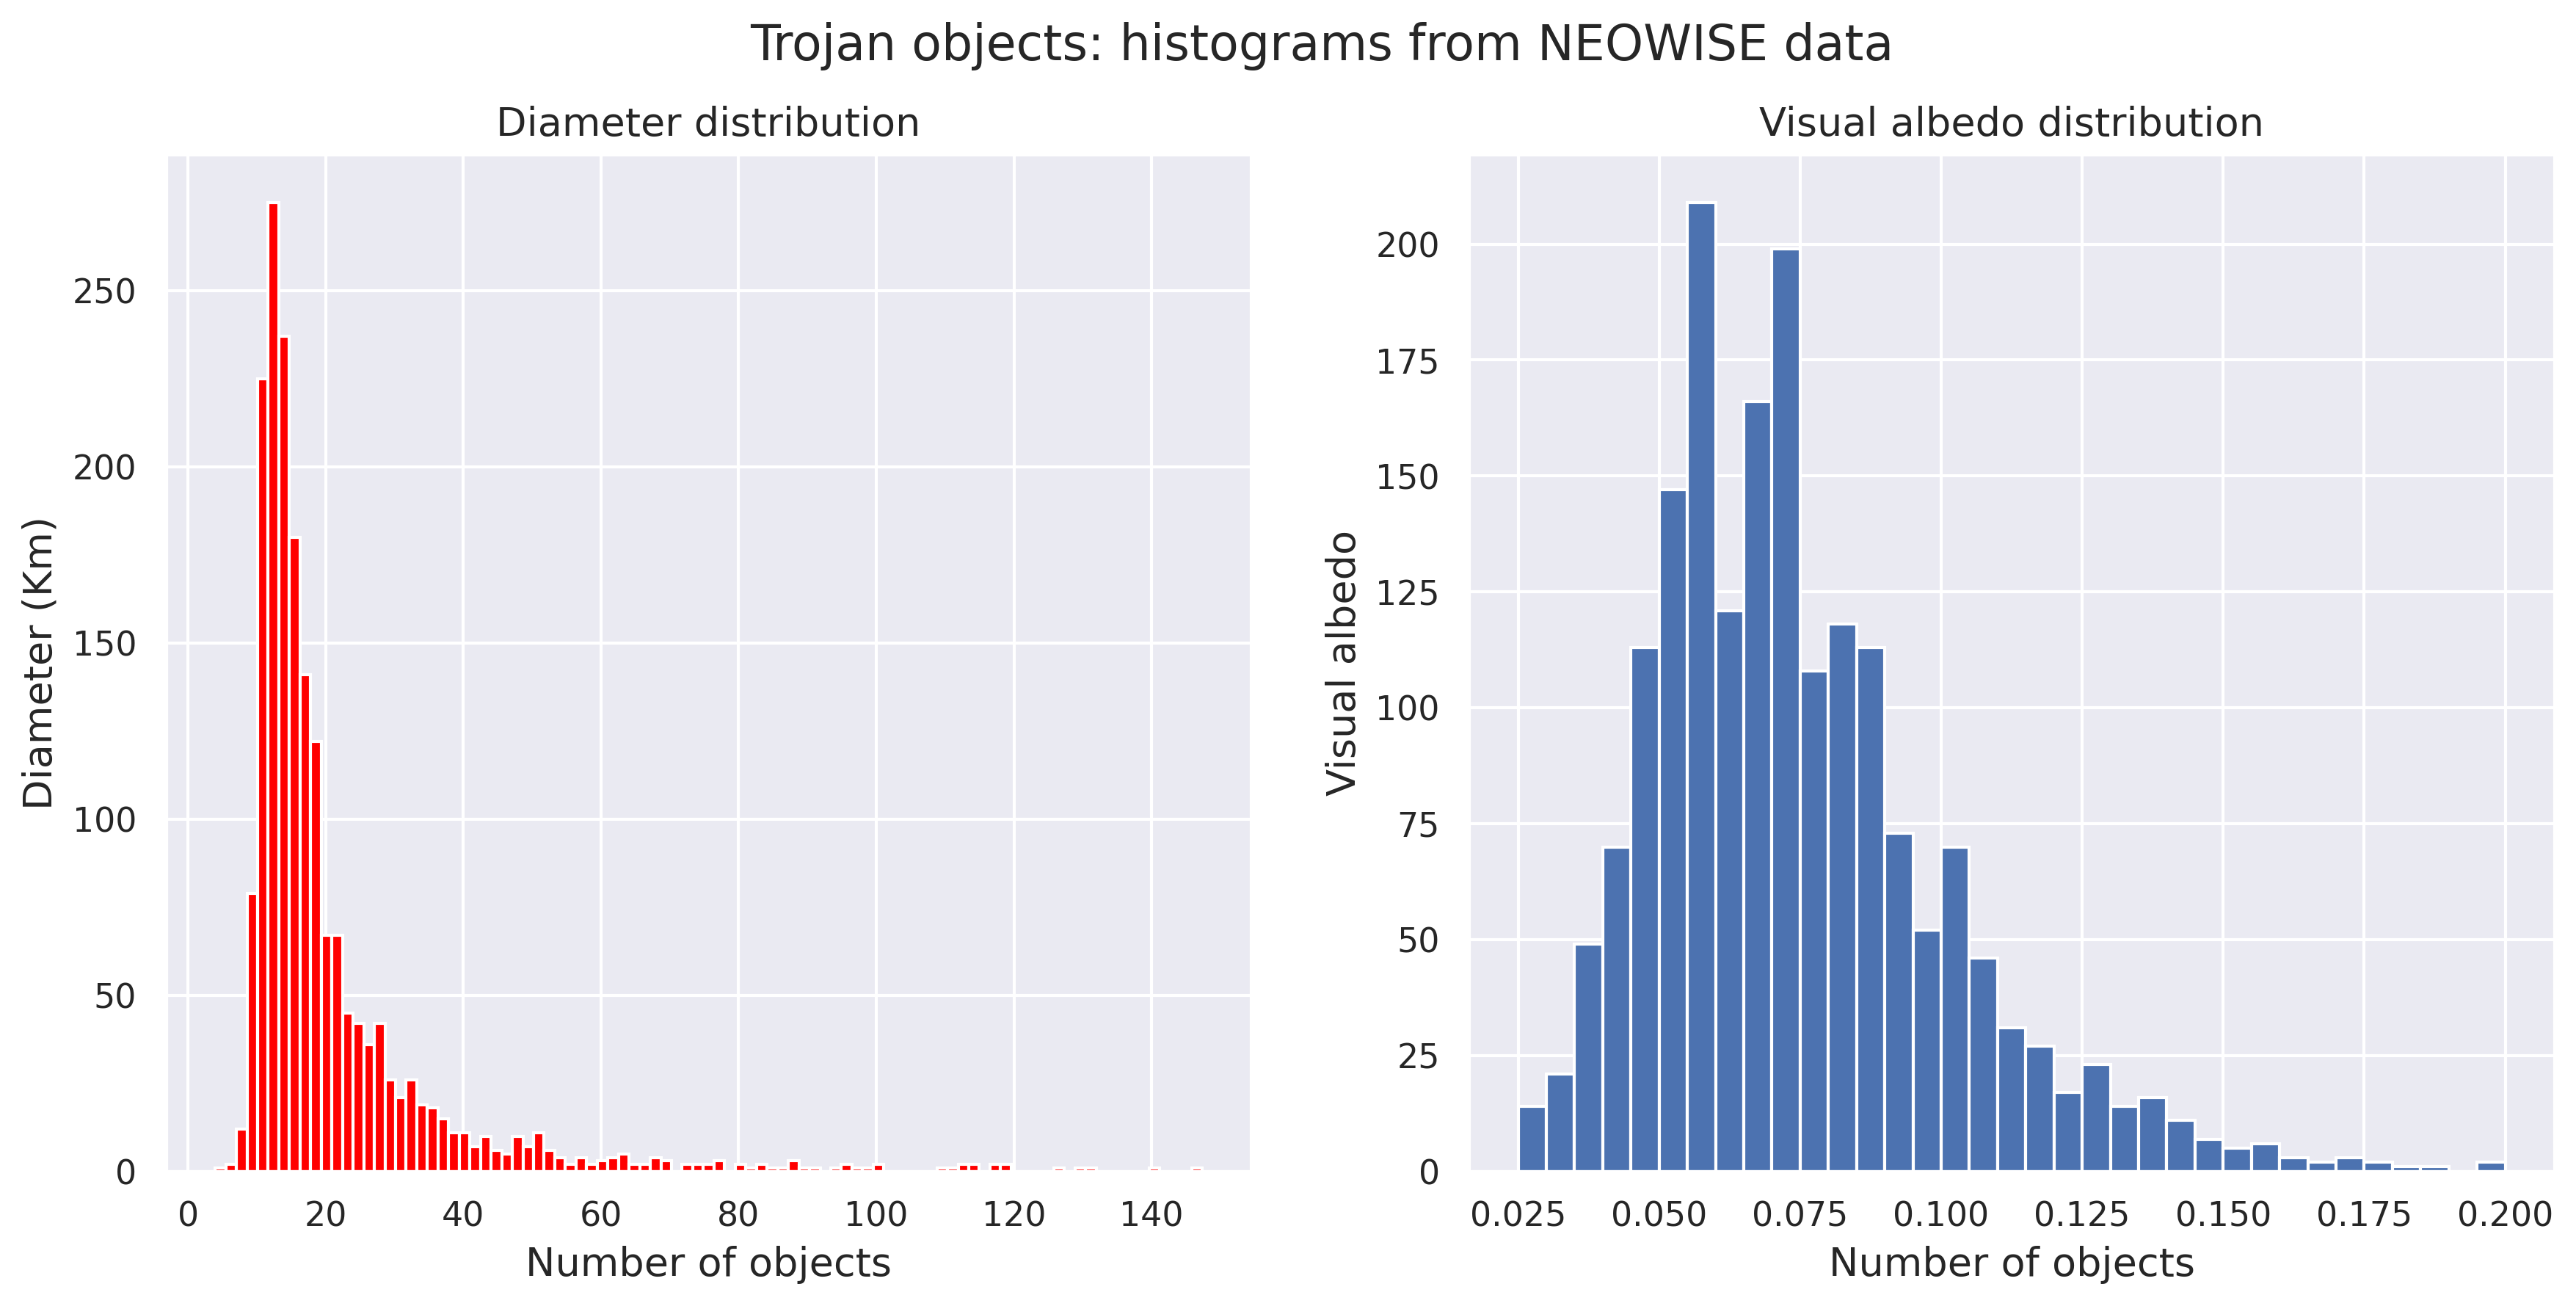

In [24]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

fig.suptitle('Trojan objects: histograms from NEOWISE data', fontsize=16)

ax1.set_title('Diameter distribution', fontsize=13)
ax1.hist(neo_wise_df['Diameter'], bins='auto', color='red')
ax1.grid()
ax1.set_xlabel("Number of objects", fontsize=13)
ax1.set_ylabel("Diameter (Km)", fontsize=13)
ax1.grid()

ax2.set_title('Visual albedo distribution', fontsize=13)
ax2.hist(neo_wise_df['V_albedo'], bins='auto')
ax2.grid()
ax2.set_xlabel("Number of objects", fontsize=13)
ax2.set_ylabel("Visual albedo", fontsize=13)
ax2.grid()

plt.savefig("figure/Trojan_objects_albedo.png", dpi=600)

## Bibliography

- https://rebound.readthedocs.io/en/latest/ipython_examples/Churyumov-Gerasimenko/
- https://rebound.readthedocs.io/en/latest/ipython_examples/WHFast/
- https://rebound.readthedocs.io/en/latest/integrators/
- https://rebound.readthedocs.io/en/latest/simulationarchive/#reading-simulation-archives
- https://rebound.readthedocs.io/en/latest/ipython_examples/Testparticles/
- https://rebound.readthedocs.io/en/latest/units/
- https://notebook.community/dtamayo/rebound/ipython_examples/OrbitPlot
- https://astroquery.readthedocs.io/en/latest/jplsbdb/jplsbdb.html